In [13]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

df = pd.read_csv("D:/ML/Logistic/weather_forecast_data_Classification_Regression.csv")

encoder = OrdinalEncoder()
df["Rain"] = encoder.fit_transform(df[["Rain"]])

x = df.iloc[:,:-1]
y = df.iloc[:,-1]

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state = 42)

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(x_train,y_train)

y_pred = rf_model.predict(x_test)

print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=["No Rain", "Rain"]))


Confusion Matrix:
 [[443   0]
 [  1  56]]

Classification Report:
               precision    recall  f1-score   support

     No Rain       1.00      1.00      1.00       443
        Rain       1.00      0.98      0.99        57

    accuracy                           1.00       500
   macro avg       1.00      0.99      1.00       500
weighted avg       1.00      1.00      1.00       500



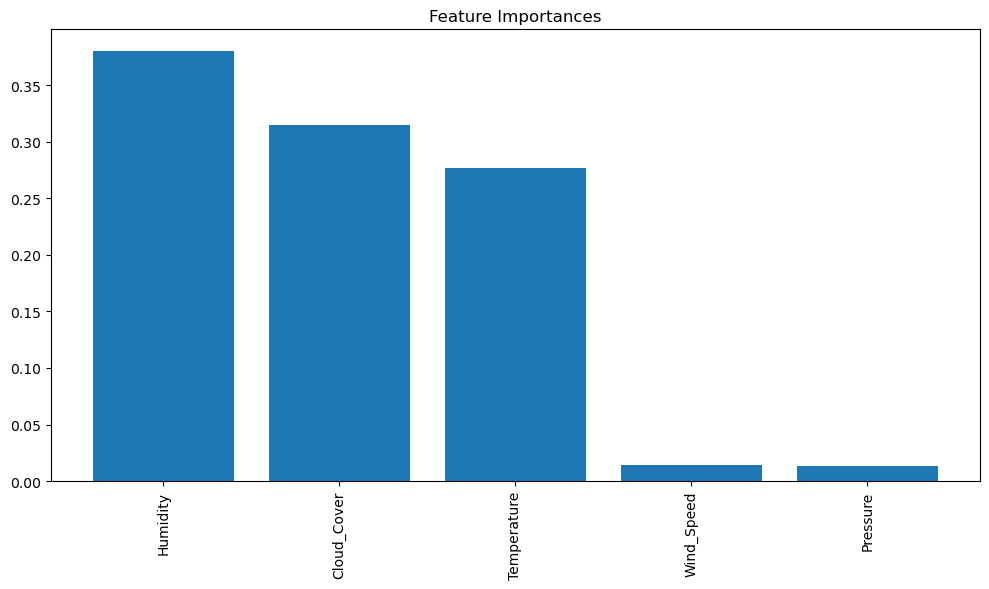

In [15]:
import matplotlib.pyplot as plt
import numpy as np

importances = rf_model.feature_importances_
features = x.columns

indices = np.argsort(importances)[::-1]
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(len(importances)), importances[indices])
plt.xticks(range(len(importances)), features[indices], rotation=90)
plt.tight_layout()
plt.show()
